In [4]:
import numpy as np
import matplotlib.pyplot as plt
from generate_artificial_mice import generate_artificial_mice
from fitting_function import fitBehavData
from mouse_fitting_functions import loadSimulatedWeights, loadMouseWeights
from mouse_plotting_functions import plotWeightTrajectories

In [20]:
seed = 101
hyper = {'sigma'   : 2**np.array([-4.0,-4.0,-5.0, -5.0, -12.0]),
         'sigInit' : 2**np.array([ 0.0, 0.0, 0.0, 0.0, 0.0])}
num_trials = 5000

generate_artificial_mice(savePath='artificial_mouse_1', N=num_trials, hyper=hyper, seed=seed)

'simulated_weights/artificial_mouse_1'

In [21]:
simulated_weights = loadSimulatedWeights('artificial_mouse_1')

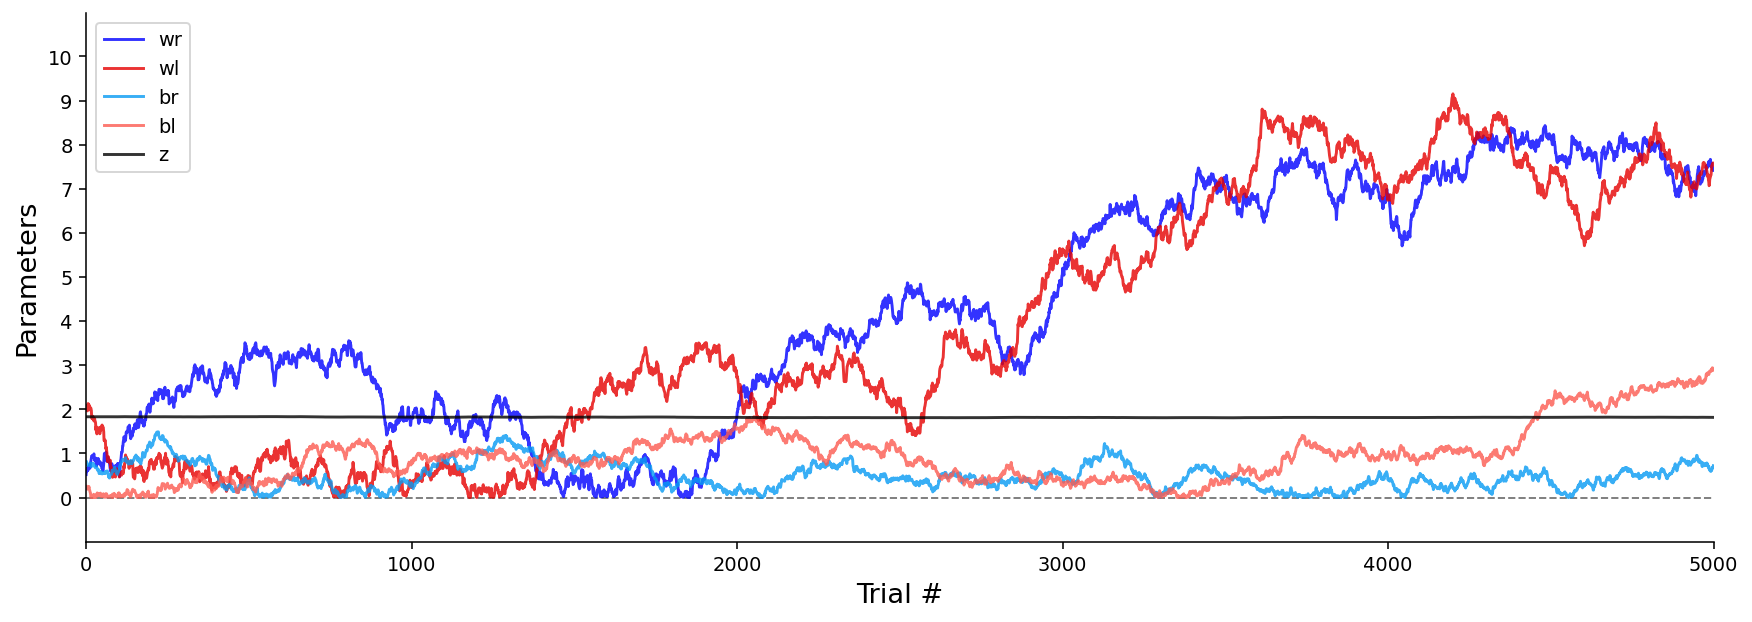

In [22]:
weight_traj = plotWeightTrajectories(simulated_weights)

In [23]:
fitBehavData(simulated_weights, mouse_name='artificial_mouse_1', session_boundaries=False, save=True, iteration=0)


Initial log-evidence: -5024.8861
sigma [ -3.  -3.  -3.  -3. -12.]

Starting hyperparameter optimization...
[ -3.13017074  -3.11279884  -3.67347494  -3.73270969 -11.999921  ]
[ -3.53705852  -3.56408965  -3.81740524  -3.65150018 -11.99808378]
[ -4.00091433  -4.23384789  -3.30275691  -4.31626347 -11.99080618]
[ -3.95109493  -4.35188029  -3.55284179  -4.46211925 -11.99159704]
[ -4.64870651  -3.72633251  -3.76182275  -4.62831145 -11.93337954]
[ -4.42410776  -3.85019532  -4.08643396  -4.82128528 -11.65767846]
[ -4.08729821  -4.21122457  -4.85291998  -5.27961442 -12.3328552 ]
[ -4.00190648  -4.10907019  -4.98130235  -5.28760383 -12.88780465]
[ -3.99763692  -4.1197951   -4.98469064  -5.28433854 -12.90337077]
[ -3.99057067  -4.12274219  -4.98803147  -5.27878159 -12.89659671]
[ -3.9806139   -4.12559602  -4.9927734   -5.27150873 -12.90009372]
[ -3.97871412  -4.1208378   -4.99979486  -5.26304166 -12.90751397]
[ -3.98518302  -4.11707676  -5.00443578  -5.2546868  -12.91242604]
[ -3.98518302  -4.117

'mouse_fits/artificial_mouse_1_fit_i_0.npy'

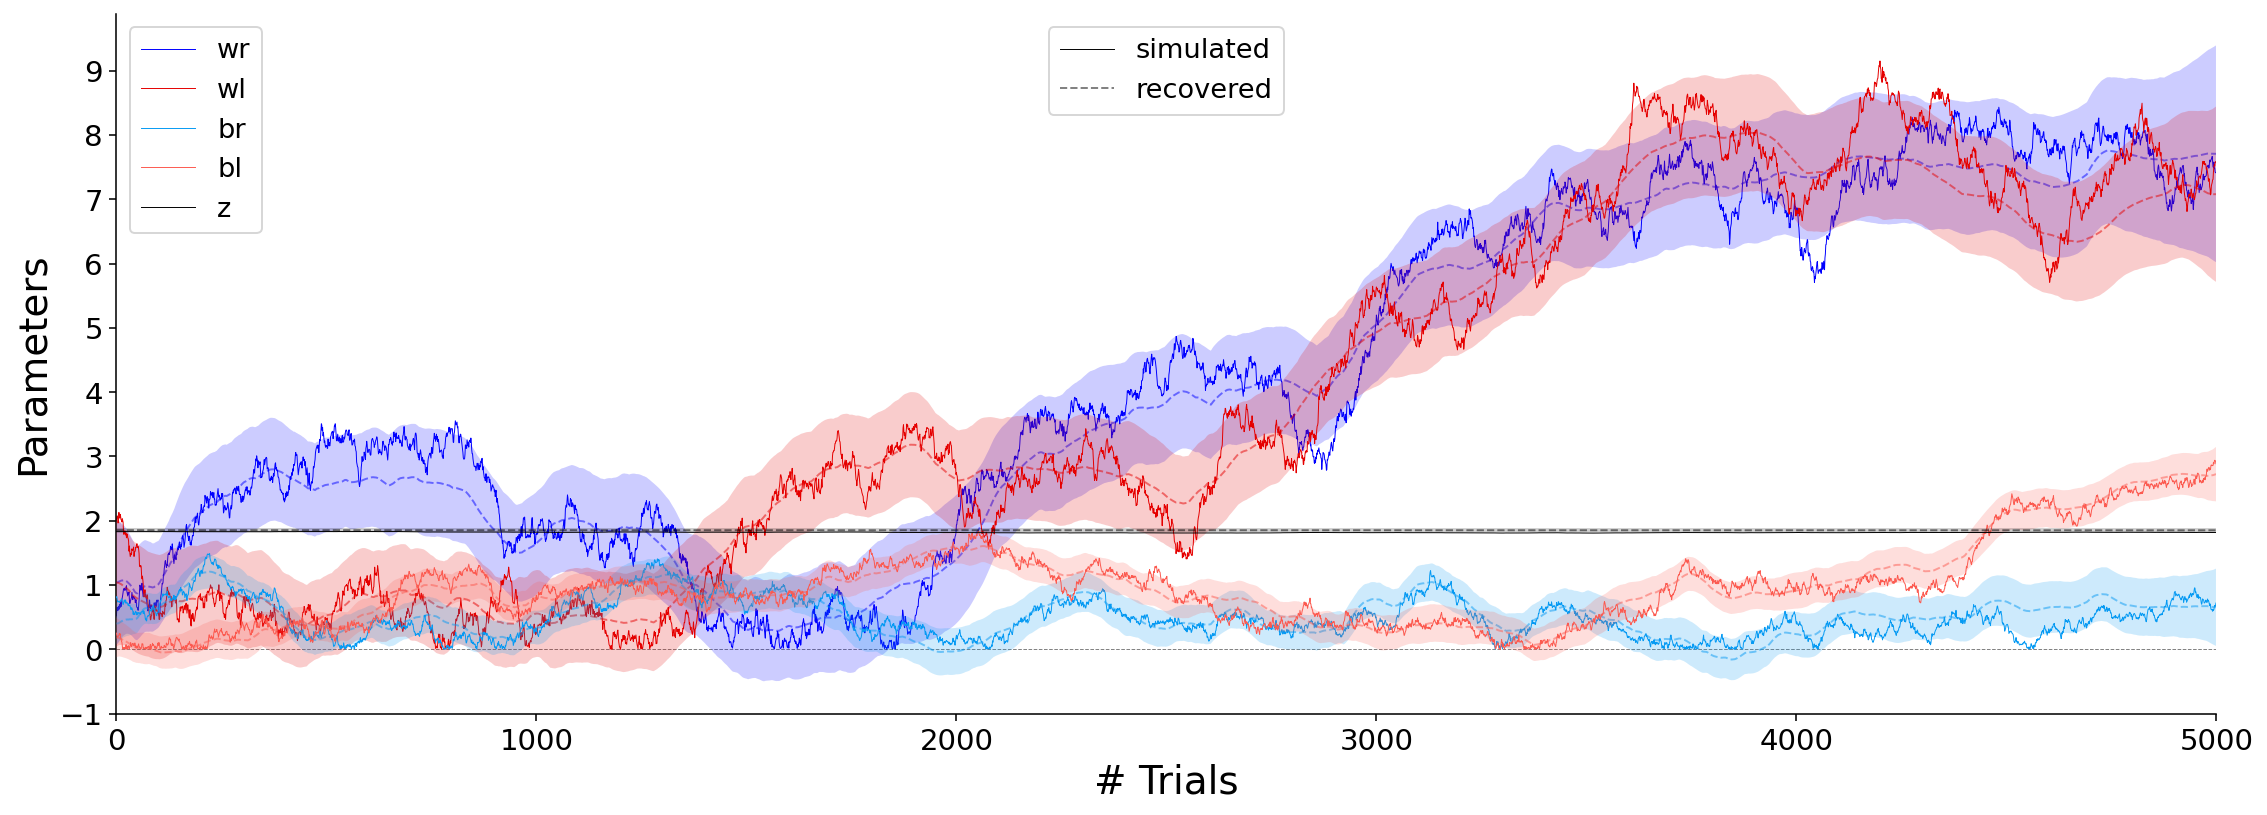

In [24]:
# plotting learnt weights vs. simulated weights

colors = {'wr': "#0000FF", 'wl': "#E50000",
          'br': "#069AF3", 'bl': "#FC5A50",
          'z': '#000000'}

# Reload data
gen = loadSimulatedWeights('artificial_mouse_1')
rec = loadMouseWeights('artificial_mouse_1')

# get labels from dict
labels = []
for j in rec['weight_names']:
    labels += [j]

# Plotting
sim_colors = [colors['wr'], colors['wl'], colors['br'], colors['bl'], colors['z']]
fig = plt.figure(figsize=(15,5))
for i, w in enumerate(labels):
    l1, = plt.plot(gen['w'][i,:], c=sim_colors[i], lw=0.5, zorder=2*i, label=w)
    l2, = plt.plot(rec['w'][i, :], c=sim_colors[i], lw=1, linestyle='--', alpha=0.5, zorder=2*i+1)
    plt.fill_between(np.arange(num_trials),
                     rec['w'][i, :] - 1.96 * rec['hess_info']['W_std'][i, :],
                     rec['w'][i, :] + 1.96 * rec['hess_info']['W_std'][i, :],
                     facecolor=sim_colors[i], alpha=0.2, zorder=2*i+1)

plt.axhline(0, color="black", linestyle="--", lw=0.5, alpha=0.5, zorder=0)

plt.xticks(1000*np.arange(0,6))
plt.gca().set_xticklabels([0,1000,2000,3000,4000,5000], fontsize=15)
plt.yticks(np.arange(-1,10,1), fontsize=15)

plt.xlim(0,5000)
plt.xlabel("# Trials", fontsize=20); plt.ylabel("Parameters", fontsize=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


legend1 = plt.legend([l1, l2], ["simulated", "recovered"], loc='upper center', prop={'size': 14})
plt.legend(loc='upper left', prop={'size': 14})
plt.gca().add_artist(legend1)

plt.subplots_adjust(0,0,1,1) 

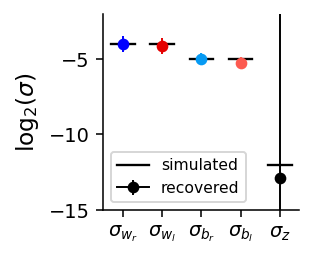

In [25]:
# plotting learnt hyper vs. simulated hyper

plt.figure(figsize=(1.4,1.4))

true_sigma =np.array([-4.0,-4.0,-5.0, -5.0, -12.0])
avg_sigma = np.log2(rec['hyp']['sigma'])
err_sigma = rec['hess_info']['hyp_std']

for i, c in enumerate(sim_colors):
    l1, = plt.plot([i-0.3, i+0.3], [true_sigma[i]]*2, color="black", linestyle="-", lw=1.2, zorder=0)
    l2 =plt.errorbar([i], avg_sigma[i], yerr=1.96*err_sigma[i], c=c, lw=1, marker='o', markersize=5)

plt.xticks([0,1,2,3, 4]); 
plt.xlim(-0.5,4.5); plt.ylim(-15,-2)

plt.gca().set_xticklabels([r"$\sigma_{w_r}$", r"$\sigma_{w_l}$", r"$\sigma_{b_r}$", r"$\sigma_{b_l}$", r"$\sigma_{z}$"])

plt.ylabel(r"$\log_2(\sigma)$")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

legend1 = plt.legend([l1, l2], ["simulated", "recovered"], prop={'size': 8}, loc='lower left')

plt.subplots_adjust(0,0,1,1) 

In [15]:
seed = 102
hyper = {'sigma'   : 2**np.array([-4.0,-4.0,-5.0, -5.0, -12.0]),
         'sigInit' : 2**np.array([ 0.0, 0.0, 0.0, 0.0, 0.0]),
         'sigDay'  : 2**np.array([ -1.0, -1.0, -3.0, -3.0, -12.0])}
num_trials = 5000

days = [500]*9

generate_artificial_mice(savePath='artificial_mouse_days', N=num_trials, hyper=hyper, seed=seed, days=days)

'simulated_weights/artificial_mouse_days'

In [9]:
simulated_weights_days = loadSimulatedWeights('artificial_mouse_days')

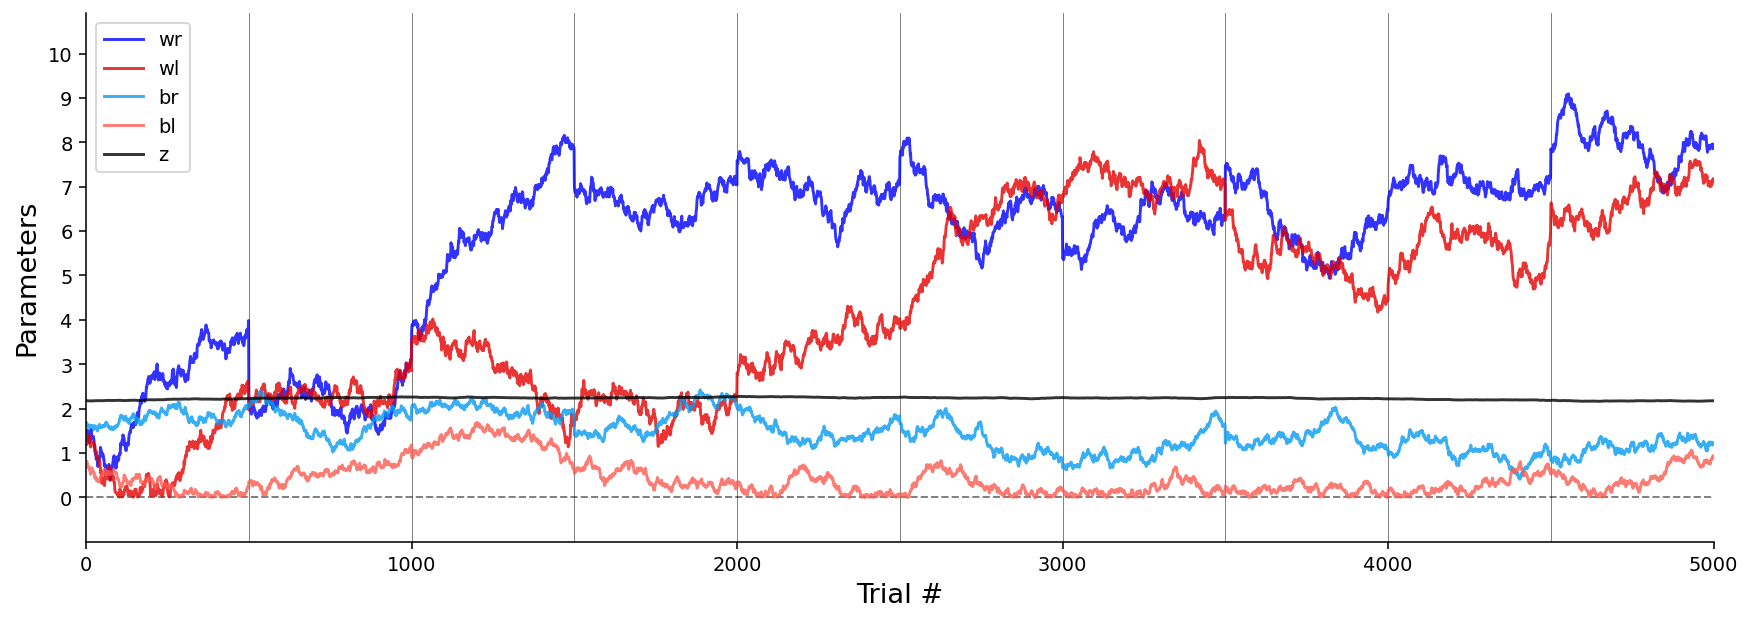

In [10]:
weight_traj = plotWeightTrajectories(simulated_weights_days)

In [16]:
fitBehavData(simulated_weights_days, mouse_name='artificial_mouse_days', session_boundaries=True, save=True, iteration=0)


Initial log-evidence: -3340.39999
sigma [ -3.  -3.  -3.  -3. -12.]
sigDay [ -2.  -2.  -2.  -2. -12.]

Starting hyperparameter optimization...
[ -3.07635393  -3.12518095  -3.8198425   -3.56981311 -11.9709315
  -1.99775311  -1.99941561  -2.00467514  -1.99631228 -11.97024635]
[ -3.92497881  -4.48303943  -3.66656317  -6.33039444 -10.67536071
  -2.58704577  -1.06565777  -2.23087666  -2.54763929 -14.39119036]
[ -3.92497881  -4.48303942  -3.66656317  -6.33039447 -10.67536071
  -2.58704578  -1.06565776  -2.23087666  -2.54763931 -14.3911904 ]
[ -3.92497881  -4.48303942  -3.66656317  -6.33039447 -10.67536071
  -2.58704578  -1.06565776  -2.23087666  -2.54763931 -14.3911904 ]
[ -3.92497881  -4.48303942  -3.66656317  -6.33039447 -10.67536071
  -2.58704578  -1.06565776  -2.23087666  -2.54763931 -14.3911904 ]
         Current function value: 3244.273263
         Iterations: 5
         Function evaluations: 1308
         Gradient evaluations: 117

Recovered hyperparameters: [ -3.92497881  -4.48303942

[ -3.53203999  -3.85748996  -4.69046326  -6.46799327 -14.47520371
  -2.32688737  -0.25035957  -1.96169565  -2.39104689 -15.29282361]
         Current function value: 3210.250214
         Iterations: 7
         Function evaluations: 746
         Gradient evaluations: 66

Recovered hyperparameters: [ -3.53203999  -3.85748996  -4.69046326  -6.46799327 -14.47520371
  -2.32688737  -0.25035957  -1.96169565  -2.39104689 -15.29282361]

Recovered log-evidence: -3210.25021

Difference in hyperparameters: 0.6631
sigma [ -3.532   -3.8575  -4.6905  -6.468  -14.4752]
sigDay [ -2.3269  -0.2504  -1.9617  -2.391  -15.2928]

Initial log-evidence: -3210.29309
sigma [ -3.532   -3.8575  -4.6905  -6.468  -14.4752]
sigDay [ -2.3269  -0.2504  -1.9617  -2.391  -15.2928]

Starting hyperparameter optimization...
[ -3.51523803  -3.82142831  -4.68736242  -6.45664303 -14.61825715
  -2.34734704  -0.2003633   -2.02180176  -2.36619582 -15.32033703]
[ -3.51521126  -3.82138357  -4.68736249  -6.4566104  -14.61844148
  -2

/home/neurotheory/samuel/dopaminepl/code/empirical_bayes_race_model/hyperOpt.py:224: RuntimeWarning: invalid value encountered in sqrt
  hyp_std = np.sqrt(np.diag(np.linalg.inv(numerical_hess[0])))


'mouse_fits/artificial_mouse_days_fit_i_0.npy'

NameError: name 'num_trials' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


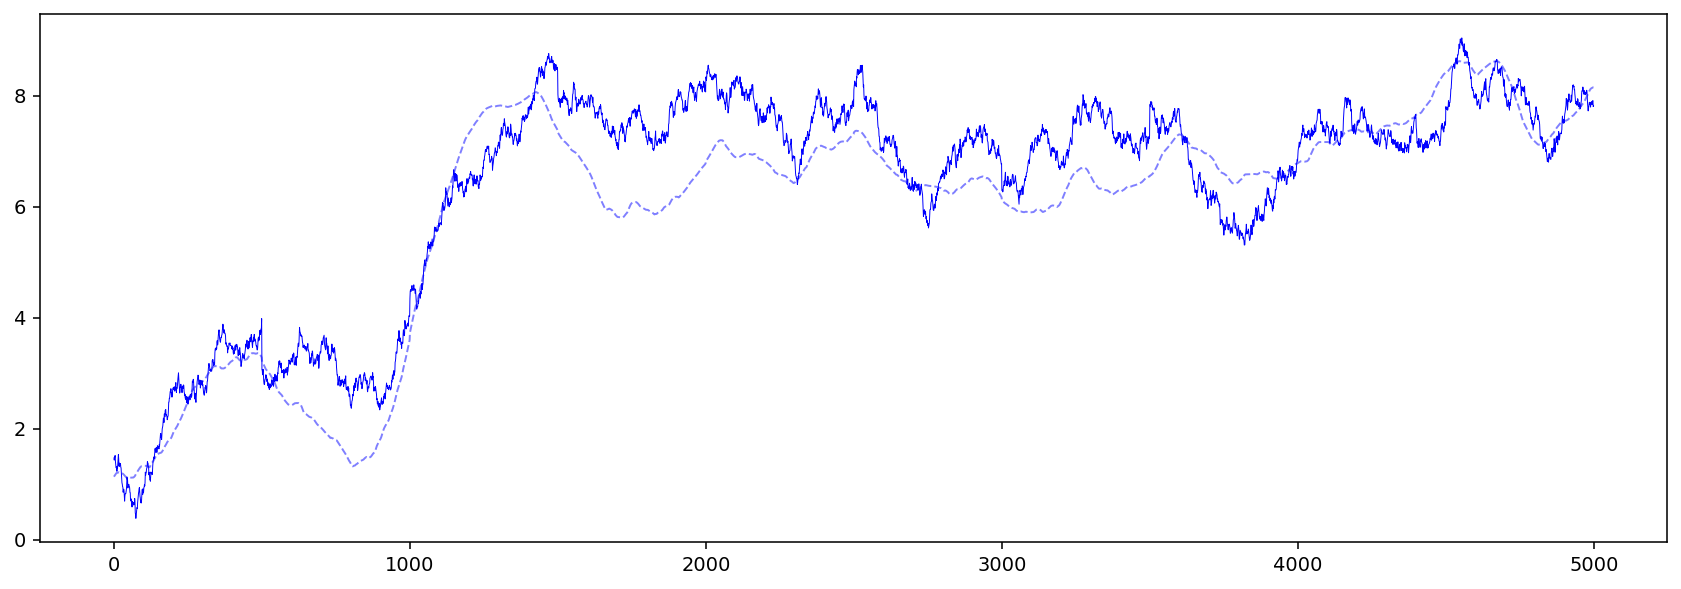

In [5]:
# plotting learnt weights vs. simulated weights

colors = {'wr': "#0000FF", 'wl': "#E50000",
          'br': "#069AF3", 'bl': "#FC5A50",
          'z': '#000000'}

# Reload data
gen = loadSimulatedWeights('artificial_mouse_days')
rec = loadMouseWeights('artificial_mouse_days')

# Infer (alphabetical) order of weights from dict
labels = []
for j in rec['weight_names']:
    labels += [j]

# Plotting
sim_colors = [colors['wr'], colors['wl'], colors['br'], colors['bl'], colors['z']]
fig = plt.figure(figsize=(15,5))
for i, w in enumerate(labels):
    l1, = plt.plot(gen['w'][i,:], c=sim_colors[i], lw=0.5, zorder=2*i, label=w)
    l2, = plt.plot(rec['w'][i, :], c=sim_colors[i], lw=1, linestyle='--', alpha=0.5, zorder=2*i+1)
    plt.fill_between(np.arange(num_trials),
                     rec['w'][i, :] - 1.96 * rec['hess_info']['W_std'][i, :],
                     rec['w'][i, :] + 1.96 * rec['hess_info']['W_std'][i, :],
                     facecolor=sim_colors[i], alpha=0.2, zorder=2*i+1)

# Plot vertical session lines
days = rec['data']['dayLength']
if days is not None:
    if type(days) not in [list, np.ndarray]:
        raise Exception('days must be a list or array.')
    if np.sum(days) <= num_trials:  # this means day lengths were passed
        days = np.cumsum(days, dtype=int)
    for d in days:
        if d < num_trials:
            plt.axvline(d, c='black', ls='-', lw=0.5, alpha=0.5, zorder=0)
    
plt.axhline(0, color="black", linestyle="--", lw=0.5, alpha=0.5, zorder=0)

plt.xticks(1000*np.arange(0,6))
plt.gca().set_xticklabels([0,1000,2000,3000,4000,5000], fontsize=15)
plt.yticks(np.arange(-1,10,1), fontsize=15)

plt.xlim(0,5000)
plt.xlabel("# Trials", fontsize=20); plt.ylabel("Parameters", fontsize=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


legend1 = plt.legend([l1, l2], ["simulated", "recovered"], loc='upper center', prop={'size': 14})
plt.legend(loc='upper left', prop={'size': 14})
plt.gca().add_artist(legend1)

plt.subplots_adjust(0,0,1,1) 

/home/neurotheory/anaconda3/envs/jax_sam/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


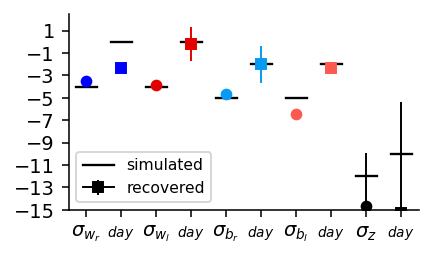

In [6]:
# Plotting
plt.figure(figsize=(2.5,1.4))

true_sigma = np.array([-4.0, -4.0, -5.0, -5.0, -12.0])
avg_sigma = np.log2(rec['hyp']['sigma'])
err_sigma = rec['hess_info']['hyp_std'][:5]
for i, c in enumerate(sim_colors):
    plt.plot([2*i-0.3, 2*i+0.3], [true_sigma[i]]*2, color="black", linestyle="-", lw=1.2, zorder=0)
    plt.errorbar([2*i], avg_sigma[i], yerr=1.96*err_sigma[i], c=c, lw=1, marker='o', markersize=5)

true_sigma = np.array([ 0.0, 0.0, -2.0, -2.0, -10])
avg_sigma = np.log2(rec['hyp']['sigDay'])
err_sigma = rec['hess_info']['hyp_std'][5:]
for i, c in enumerate(sim_colors):
    l1, = plt.plot([2*i-0.3+1, 2*i+0.3+1], [true_sigma[i]]*2, color="black", linestyle="-", lw=1.2, zorder=0)
    l2 = plt.errorbar([2*i+1], avg_sigma[i], yerr=1.96*err_sigma[i], c=c, lw=1, marker='s', markersize=5)

plt.xticks(np.arange(10))
plt.yticks([-15,-13,-11, -9, -7, -5, -3, -1, 1, 3])
plt.gca().set_xticklabels([r"$\sigma_{w_r}$", r"$_{day}$",
                           r"$\sigma_{w_l}$", r"$_{day}$",
                           r"$\sigma_{b_r}$", r"$_{day}$",
                           r"$\sigma_{b_l}$", r"$_{day}$",
                           r"$\sigma_{z}$", r"$_{day}$"])
plt.xlim(-0.5,9.5); plt.ylim(-15,2.5)
# plt.ylabel(r"$\log_2(\sigma)$")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

legend1 = plt.legend([l1, l2], ["simulated", "recovered"], prop={'size': 8}, loc='lower left')

plt.subplots_adjust(0,0,1,1) 